### Importation des bibliothèques utiles

In [1]:
import pandas as pd
import numpy as np
import math

# Modélisation

In [2]:
dfBrokenleggen = pd.read_csv("Brokenleggen.csv", index_col="Quarter/Year", parse_dates=True)
dfBrokenleggen.head(5)

,Sans emploi
Quarter/Year,
1996-03-01,105
1996-06-01,214
1996-09-01,226
1996-12-01,126
1997-03-01,112


## Graphique de la série temporel

<AxesSubplot:xlabel='Quarter/Year'>

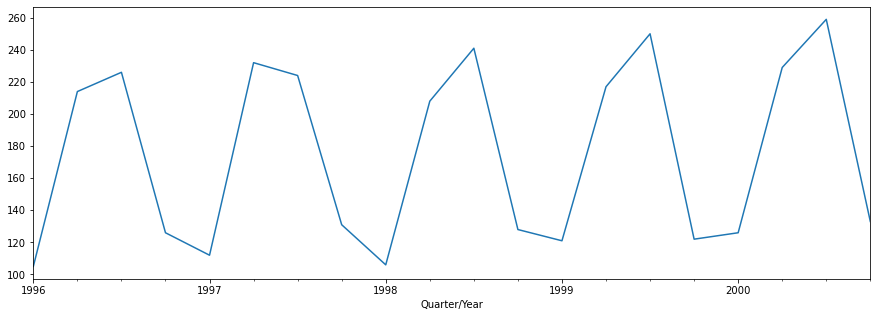

In [3]:
dfBrokenleggen["Sans emploi"].plot(figsize=(15, 5))


In [4]:
dfBrokenleggen["Moyenne mobile"] = dfBrokenleggen.rolling(4, center=True).mean()
dfBrokenleggen["Coef. sais."] = dfBrokenleggen["Sans emploi"]/dfBrokenleggen["Moyenne mobile"]
print(dfBrokenleggen)

              Sans emploi  Moyenne mobile  Coef. sais.
Quarter/Year                                          
1996-03-01            105             NaN          NaN
1996-06-01            214             NaN          NaN
1996-09-01            226          167.75     1.347243
1996-12-01            126          169.50     0.743363
1997-03-01            112          174.00     0.643678
1997-06-01            232          173.50     1.337176
1997-09-01            224          174.75     1.281831
1997-12-01            131          173.25     0.756133
1998-03-01            106          167.25     0.633782
1998-06-01            208          171.50     1.212828
1998-09-01            241          170.75     1.411420
1998-12-01            128          174.50     0.733524
1999-03-01            121          176.75     0.684583
1999-06-01            217          179.00     1.212291
1999-09-01            250          177.50     1.408451
1999-12-01            122          178.75     0.682517
2000-03-01

## Coefficients saisonnières moyens

In [5]:
allMonth = dfBrokenleggen["Sans emploi"].index.month
trimesters = allMonth.unique()
Moyens = pd.DataFrame(index=trimesters,columns=["moyens"])
for month in trimesters:
    Moyens["moyens"][month] =  dfBrokenleggen["Coef. sais."][allMonth == month].mean()
print(Moyens["moyens"])
print(Moyens["moyens"].sum())

Quarter/Year
3     0.663826
6     1.251715
9     1.367165
12    0.728884
Name: moyens, dtype: object
4.011590066893557


## Coefficients saisonnières moyens ajusté

In [6]:
Moyens["ajust."] = Moyens["moyens"]*len(trimesters)/Moyens["moyens"].sum()
print(Moyens)
print(Moyens.sum())

                moyens    ajust.
Quarter/Year                    
3             0.663826  0.661908
6             1.251715  1.248098
9             1.367165  1.363215
12            0.728884  0.726779
moyens    4.01159
ajust.        4.0
dtype: object


## Valeur désaisonalisé

<AxesSubplot:xlabel='Quarter/Year'>

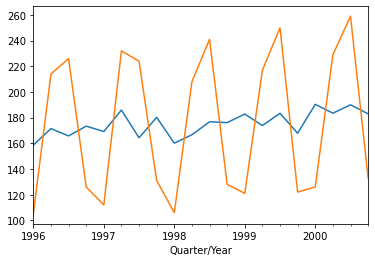

In [7]:
dfBrokenleggen['valeur désais.'] = dfBrokenleggen["Sans emploi"] / Moyens["ajust."].loc[np.tile(Moyens.index,int(len(dfBrokenleggen)/len(Moyens)))].to_numpy()
dfBrokenleggen['valeur désais.'] =  dfBrokenleggen['valeur désais.'].astype("float32")
dfBrokenleggen['valeur désais.'].plot()
dfBrokenleggen['Sans emploi'].plot()

## Droite de regression de la tendance

In [8]:
dfBrokenleggen["temps"] = [i for i in range(1,len(dfBrokenleggen)+1)]
xBar = dfBrokenleggen['temps'].mean()
yBar = dfBrokenleggen['valeur désais.'].mean()
a = (dfBrokenleggen["temps"].cov(dfBrokenleggen['valeur désais.'], ddof=-92))/dfBrokenleggen["temps"].std()
b = yBar - a*xBar
print(f'y = %fx + %f'%(a,b))
dfBrokenleggen["estimé"] = [a*x + b for x in range(1,len(dfBrokenleggen)+1)]
print(dfBrokenleggen[["temps", 'valeur désais.', "estimé"]])
print("MSE: "  + str(((dfBrokenleggen["valeur désais."]- dfBrokenleggen["estimé"])**2).mean()))


y = 1.029857x + 164.354392
              temps  valeur désais.      estimé
Quarter/Year                                   
1996-03-01        1      158.632370  165.384249
1996-06-01        2      171.460831  166.414107
1996-09-01        3      165.784531  167.443964
1996-12-01        4      173.367813  168.473821
1997-03-01        5      169.207870  169.503678
1997-06-01        6      185.882767  170.533535
1997-09-01        7      164.317413  171.563392
1997-12-01        8      180.247482  172.593250
1998-03-01        9      160.143158  173.623107
1998-06-01       10      166.653519  174.652964
1998-09-01       11      176.787933  175.682821
1998-12-01       12      176.119690  176.712678
1999-03-01       13      182.804932  177.742535
1999-06-01       14      173.864487  178.772393
1999-09-01       15      183.389969  179.802250
1999-12-01       16      167.864075  180.832107
2000-03-01       17      190.358841  181.861964
2000-06-01       18      183.479111  182.891821
2000-09-01   

## Prédiction du nombre de résidents sans emploi pour le mois de décembre de 2001

In [9]:
dec2001Temps = 24
valeurDesaison = a*dec2001Temps + b
valeurReel = valeurDesaison * Moyens["ajust."][12]
print(f"La valeur désaisonné vaut %f\Le nombre de sans emploi en dec. 2001 est %d"%(valeurDesaison, math.floor(valeurReel)))

La valeur désaisonné vaut 189.070964\Le nombre de sans emploi en dec. 2001 est 137
